In [25]:
%%capture
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
open_data = xr.open_dataset('../Data/sst.mnmean.nc')
open_data = open_data.sst
open_data

<xarray.DataArray 'sst' (time: 1981, lat: 89, lon: 180)>
[31735620 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [3]:
rgbset2 = np.array([[20,100,210,256],
[30,110,235,256],
[40,130,240,256],
[60,150,245,256],
[80,165,245,256],
[120,185,250,256],
[150,210,250,256],
[180,240,250,256],
[225,255,255,256],
[245,245,245,256],
[255,250,170,256],
[255,232,120,256],
[255,192,60,256],
[255,160,0,256],
[255,96,0,256],
[255,50,0,256],
[225,20,0,256],
[192,0,0,256],
[165,0,0,256]])

rgbset2.shape
newcmp = ListedColormap(rgbset2/256)

In [4]:
clim = open_data.sel(time=slice('1981-01-01','2010-12-31')).groupby('time.month').mean(dim='time')
anom = open_data.groupby('time.month') - clim
anom

/home/grivera/miniconda3/envs/Work/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1981, lat: 89, lon: 180)>
array([[[-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        [-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        [-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       ...,

       [[-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        [-4.768372e-07, -4.768372e-07, ..., -4.768372e-07, -4.768372e-07],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,    

In [35]:
ymin = -2.5
ymax = 2.5
years = mdates.YearLocator(3)
myFmt = mdates.DateFormatter('%Y')

## NIÑO34 index
#### Warm pool el niño?

In [6]:
nino4 = anom.sel(lat=slice(5,-5), lon=slice(160,210))
nino3 = anom.sel(lat=slice(5,-5), lon=slice(210,270))

In [7]:
nino4_mean = nino4.mean(dim=['lat','lon'])
nino4_std = nino4_mean.std()

In [8]:
nino3_mean = nino3.mean(dim=['lat','lon'])
nino3_std = nino3_mean.std()

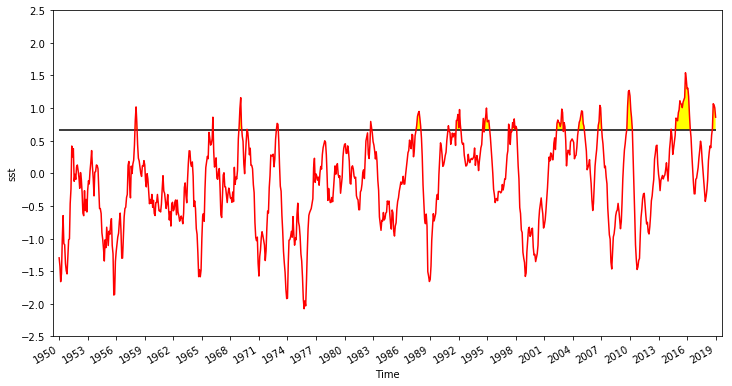

In [44]:
nino4_slice = nino4_mean.sel(time=slice('1950-01-01','2019-12-31'))
# plot
fig, ax = plt.subplots(figsize=(12,6))
nino4_slice.plot(ax=ax,c='r')
ax.hlines(nino4_std.data,nino4_slice.time.data.min(),nino4_slice.time.data.max())
ax.fill_between(nino4_slice.time.data,nino4_slice.data,nino4_std.data,where=nino4_slice.data>=nino4_std.data,facecolor='yellow')
# Ax setup
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt)
# Ax lims
ax.set_ylim(ymin,ymax)
ax.set_yticks(np.arange(ymin,ymax+0.1,0.5))
ax.margins(0.01,0.1)

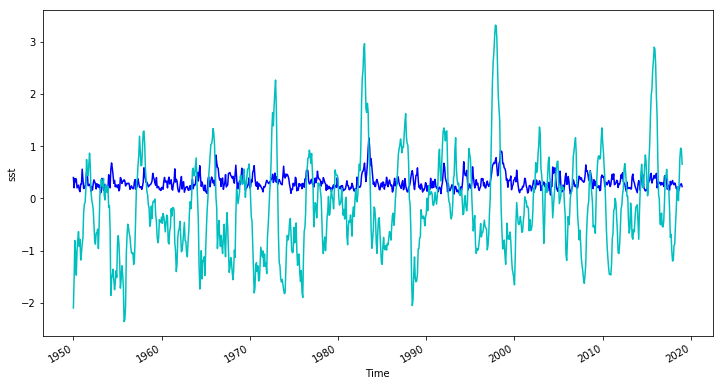

In [103]:
nino3_std.sel(time=slice('1950-01-01','2019-12-31')).plot(figsize=(12,6),c='b')
nino3_mean.sel(time=slice('1950-01-01','2019-12-31')).plot(c='c')

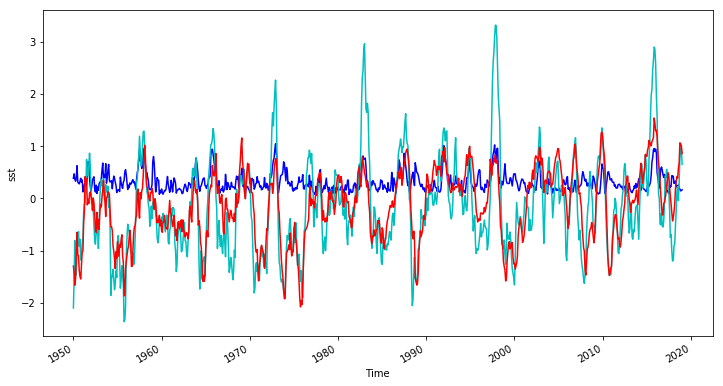

In [106]:
nino4_std.sel(time=slice('1950-01-01','2019-12-31')).plot(figsize=(12,6),c='b')
nino3_mean.sel(time=slice('1950-01-01','2019-12-31')).plot(c='c')
nino4_mean.sel(time=slice('1950-01-01','2019-12-31')).plot(c='r')

## El Nino Modoki index (EMI)

In [48]:
c_pacific = anom.sel(lat=slice(10,-10), lon=slice(165,220)).mean(dim=['lat','lon'])
w_pacific = anom.sel(lat=slice(20,-10), lon=slice(125,145)).mean(dim=['lat','lon'])
e_pacific = anom.sel(lat=slice(5,-15), lon=slice(250,290)).mean(dim=['lat','lon'])
avrg = 0.5*w_pacific + 0.5*e_pacific
EMI = c_pacific-avrg

<xarray.DataArray 'sst' (time: 1981)>
array([-0.235504,  0.171497,  0.435985, ...,  0.440308,  0.298454,  0.354909],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2019-01-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12 1

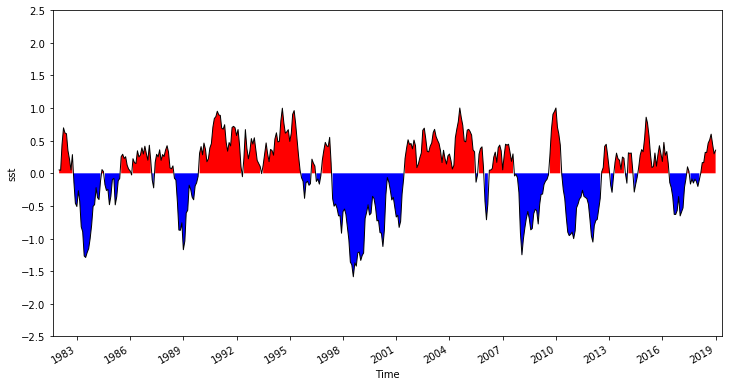

In [56]:
EMI_slice = EMI.sel(time=slice('1982-01-01','2019-12-31'))
# plot
fig, ax = plt.subplots(figsize=(12,6))
ax.fill_between(EMI_slice.time.data,EMI_slice.data,0,where=EMI_slice.data>=0,facecolor='red')
ax.fill_between(EMI_slice.time.data,EMI_slice.data,0,where=EMI_slice.data<=0,facecolor='blue')
EMI_slice.plot(ax=ax,c='k',lw=1)

# Ax setup
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt)
# Ax lims
ax.set_ylim(ymin,ymax)
ax.set_yticks(np.arange(ymin,ymax+0.1,0.5))
ax.margins(0.01,0.1)